<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Bootstrap Aggregating (Bagging) for classification with Python***

$ \ $


$\color{aquamarine}{\text{Bagging}}$ is a method for generating multiple model versions and aggregating the ensemble of models to make a single prediction. For classification, aggregation performs majority vote when predicting a class. The various versions of the model are formed by performing Bootstrap sampling of the training set and using these to train each model in the ensemble .

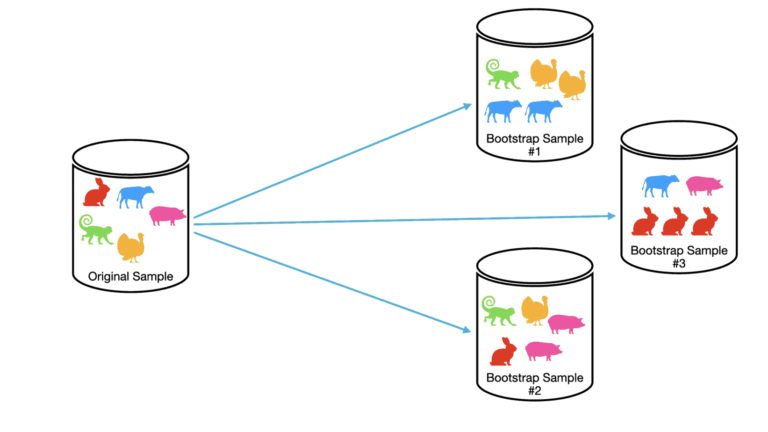

$ \ $

----

## ***Objectives***

After completing this lab you will be able to:

*   Understand Bootstrap sampling.

*   Understand  Model Instability.

*   Apply Bagging.

*   Understand when to use Bagging.

$ \ $

----

## ***Table of contents***

$ \ $

$(1)$ About the dataset.

$(2)$ Data pre-processing and selection.

$(3)$ Modeling (Logistic Regression with Scikit-learn).

$(4)$ Evaluation.

$(5)$ Practice.

$ \ $

----

## ***Import libraries***

Let's first import required libraries.

In [ ]:
# Library for reading in data and using dataframes
import pandas as pd

# Using numpy arrays
import numpy as np

# Data preprocessing functions like LabelEncoder
from sklearn import preprocessing

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# Model accuracy
from sklearn import metrics

# Give loops a progress bar
from tqdm import tqdm

#  When the StringIO object is created it is initialized by passing a string to the constructor. If no string is passed the StringIO will start empty. In both cases, the initial cursor on the file starts at zero.
from  io import StringIO

# PyDotPlus is an improved version of the old pydot project that provides a Python Interface to Graphviz’s Dot language.
import pydotplus

# The image module supports basic image loading, rescaling and display operations.
import matplotlib.image as mpimg

# it creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
from sklearn import tree

# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset. 
from sklearn.tree import DecisionTreeClassifier

# A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregates their individual predictions to form a final prediction.
from sklearn.ensemble import BaggingClassifier

# Supervisor Calls (SVC) are exceptions targeted at software and operating systems for generating system function calls
from sklearn.svm import SVC

# Resample arrays or sparse matrices in a consistent way.
from sklearn.utils import resample

# GridSearchCV implementa un método de "ajuste" y "puntuación". También implementa “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” y “inverse_transform” si están implementados en el estimador utilizado.
from sklearn.model_selection import GridSearchCV


In [ ]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

----

## ***Train - Test accuracy function***

$ \ $

$(1)$ This function calculates the train and test accuracy of a model.

In [ ]:
def get_accuracy(X_train, X_test, y_train, y_test, model):

  # predecimos un conjunto de datos con la data de prueba y calculamos la precision entre y_test, y_pred
  y_pred_test = model.predict(X_test)
  accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

  # predecimos un conjunto de datos con la data de  entrenamiento y calculamos la precision entre y_test, y_pred
  y_pred_train = model.predict(X_train)
  accuracy_train = metrics.accuracy_score(y_train, y_pred_train)

  # la funcion devuelve 
  return  {"test Accuracy": accuracy_test, "train Accuracy": accuracy_train}

$ \ $

$(2)$ This function creates visualizations of decision trees.

In [ ]:
def plot_tree(model, filename = "tree.png"):
    
    # creamos un objeto con StringIO()
    dot_data = StringIO()
  
    # tomaremos estos rasgos del dataframe
    featureNames = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']

    # Esta función genera una representación GraphViz del árbol de decisiones, que luego se escribe en out_file
    out = tree.export_graphviz(model, feature_names = featureNames, out_file = dot_data, class_names = ['left','stay'], filled = True,  special_characters = True, rotate = False)  

    # Cargamos el gráfico según lo definido por los datos en formato DOT. Se supone que los datos están en formato DOT.
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

    # escribimos el grafico anterior en formato png
    graph.write_png(filename)

    # Leer la imagen de un archivo en una matriz
    img = mpimg.imread(filename)

    # describimos el tamaño de la imagen
    plt.figure(figsize = (100, 200))

    # la funcion muestra la imagen que describe el grafico del arbol
    return plt.imshow(img, interpolation = 'nearest')


$ \ $

$(3)$ This function creates a graph of ***`training accuracy`*** VS ***`how many estimators`*** (Decision Trees) a BaggingClassifier uses.

In [ ]:
def get_accuracy_bag(X, y, title, xlabel = 'Number Estimators'):
    
    # describimos una lista con los numeros del 1 al 69
    N_estimators = [n for n in range(70)]

    # creamos una matriz de tamaño 20x70 de ceros
    train_acc = np.zeros((20, 70))

    # creamos una matriz de tamaño 20x70 de ceros
    test_acc = np.zeros((20, 70))

    # creamos una matriz de tamaño 20x70 de ceros 
    train_time = np.zeros((20, 70))

    # creamos una matriz de tamaño 20x70 de ceros
    test_time = np.zeros((20, 70))

    
    # realizamos una iteracion sobre los numeros que se encuentran entre 0 y 19
    # tqdm() significa progreso y se utiliza para crear una barra de progreso inteligente para los bucles.
    for m in tqdm(range(20)):

        # separamos los datos en datos de entrenamiento y datos de prueba con 30 % de datos de prueba y 70 % de datos de entrenamiento
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

        # realizamos una iteracion sobre los numeros que se encuentran entre 1 y 69
        for n in N_estimators:

            # DecisionTreeClassifier es una clase capaz de realizar una clasificación de varias clases en un conjunto de datos.
            estimator = DecisionTreeClassifier(criterion = "entropy", max_depth = 10)

            # BaggingClassifier es un metaestimador que ajusta los clasificadores base cada uno en subconjuntos aleatorios del conjunto de datos original y luego agrega sus predicciones individuales para formar una predicción final.      
            Bag = BaggingClassifier(estimator = estimator, n_estimators = n+1, bootstrap = True, random_state = 0)

            # entrenamos el metaestimador bag con la data de entrenamiento X_train, y_train
            Bag.fit(X_train, y_train)          
            
            #  obtenemos la precision entre los datos de entrenamiento, los datos de prueba y el metaestimador bag
            Accuracy = get_accuracy(X_train, X_test, y_train, y_test, Bag)              
            
            # describimos el coeficiente (m,n) de la matriz train_acc[m, n]
            train_acc[m, n] = Accuracy['train Accuracy']

            # describimos el coeficiente (m,n) de la matriz train_acc[m, n]
            test_acc[m , n] = Accuracy['test Accuracy']
        
        
    # creamos una imagen donde describiremos varios plots en esta misma
    fig, ax1 = plt.subplots()

    # Creamos nuevos ejes con un eje x invisible y un eje y independiente posicionado frente al original (es decir, a la derecha).
    ax2 = ax1.twinx()

    # realizamos el plot del promedio de los renglones del array de entrenamiento train_acc
    ax1.plot(train_acc.mean(axis = 0))

    # realizamos el plot del promedio de los renglones del array de prueba de color rojo
    ax2.plot(test_acc.mean(axis = 0), c = 'r')

    # establecemos la etiqueta del eje x
    ax1.set_xlabel(xlabel)

    # establecemos la etiqueta del eje y de color azul
    ax1.set_ylabel('Training accuracy', color = 'b')

    # establecemos la etiqueta del eje y de color rojo
    ax2.set_ylabel('Testing accuracy', color = 'r')

    # describimos el titulo del plot
    plt.title(title)

    # la funcion devuelve la imagen creada en pantalla
    return plt.show()
    
   

$ \ $

----

## ***Customer churn***

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. 


$ \ $

----

## ***About the dataset***

$ \ $

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover (descubrir) insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

$ \ $

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

$ \ $

------

## ***Information dataset***

The dataset includes information about:

*   Customers who left within the last month – the column is called ***`Churn`***.

*   Services that each customer has signed up (inscrito) for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges.,

*   Demographic info about customers – gender, age range, and if they have partners and dependents



$ \ $

----

## ***Load Data From CSV File***

We load our data set and show the first 5 rows.

In [ ]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


$ \ $

---

## ***Data pre-processing and selection***

Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm.

In [ ]:
churn_df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

In [ ]:
# seleccionamos algunos rasgos del dataset
columns = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']

# solo trabajamos con los rasgos seleccionados
churn_df = churn_df[columns]

# seleccionamos la columna "churn" y le damos formato tipo numeros enteros
# churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.loc[:, 'churn'] = churn_df['churn'].astype('int')

# mostramos el resultado del dataframe en pantalla
churn_df.head()

<ipython-input-9-877449fb15ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


$ \ $

----

## ***Exercise (practice)***

$ \ $

$(1)$ How many rows and columns are in this dataset in total? 


In [ ]:
churn_df.shape

(200, 10)

$ \ $

$(2)$ What are the names of columns?

In [ ]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

$ \ $

-----

## ***Bootstrap Sampling***

$ \ $

Bootstrap Sampling (muestra de arranque) is a method that involves drawing of sample data repeatedly with replacement from a data source to estimate a model parameter. Scikit-learn has methods for Bagging (embolsar - empaquetar) but its helpful to understand Bootstrap sampling.

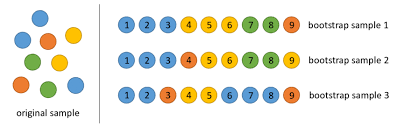

$ \ $

$(1)$ We can perform a bootstrap sample using the function <code>resample</code>; we see the dataset is the same size, but some rows are repeated.

In [ ]:
new_data = churn_df.head()
new_data

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [ ]:
resample(new_data)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0


$ \ $

---

## ***Train/Test dataset***

$ \ $

$(1)$ Let's define X and y for our dataset.


In [ ]:
# describimos los rasgos del dataframe que queremos estudiar
rasgos = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']

# creamos un dataframe con los rasgos predictores
X = churn_df[rasgos]

# mostramos en pantalla nuestra data
X.head()

,tenure,age,address,income,ed,employ,equip
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


In [ ]:
# describimos la data que deseamos estudiar o predecir
y = churn_df['churn']

# mostramos en pantalla nuestra data
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

$ \ $


$(2)$ We split our dataset into train and test set.


In [ ]:
# separamos nuestro conjunto de datos en datos de prueba y datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# imprimimos en pantalla el tamaño de la data de entrenamiento
print('Train set: ', X_train.shape,  y_train.shape)

# imprimimos en pantalla el tamaño de la data de prueba
print('Test set: ', X_test.shape,  y_test.shape)

Train set:  (140, 7) (140,)
Test set:  (60, 7) (60,)


$ \ $

----

## ***Decision  Tree Classifier  with Scikit-learn***

$ \ $

A Decision tree Classifier classifies a sample by learning simple decision rules inferred from the data. One problem with Decision Tree Classifiers is overfitting (they do well with the training data, but they do not Generalize well). 


* Trees have low bias and high variance; as such, they are a prime candidate for Bagging. 

* Instability is another term used to describe models that overfit. Instability is characterized by a slight change in the training set that causes a drastic change in the model.



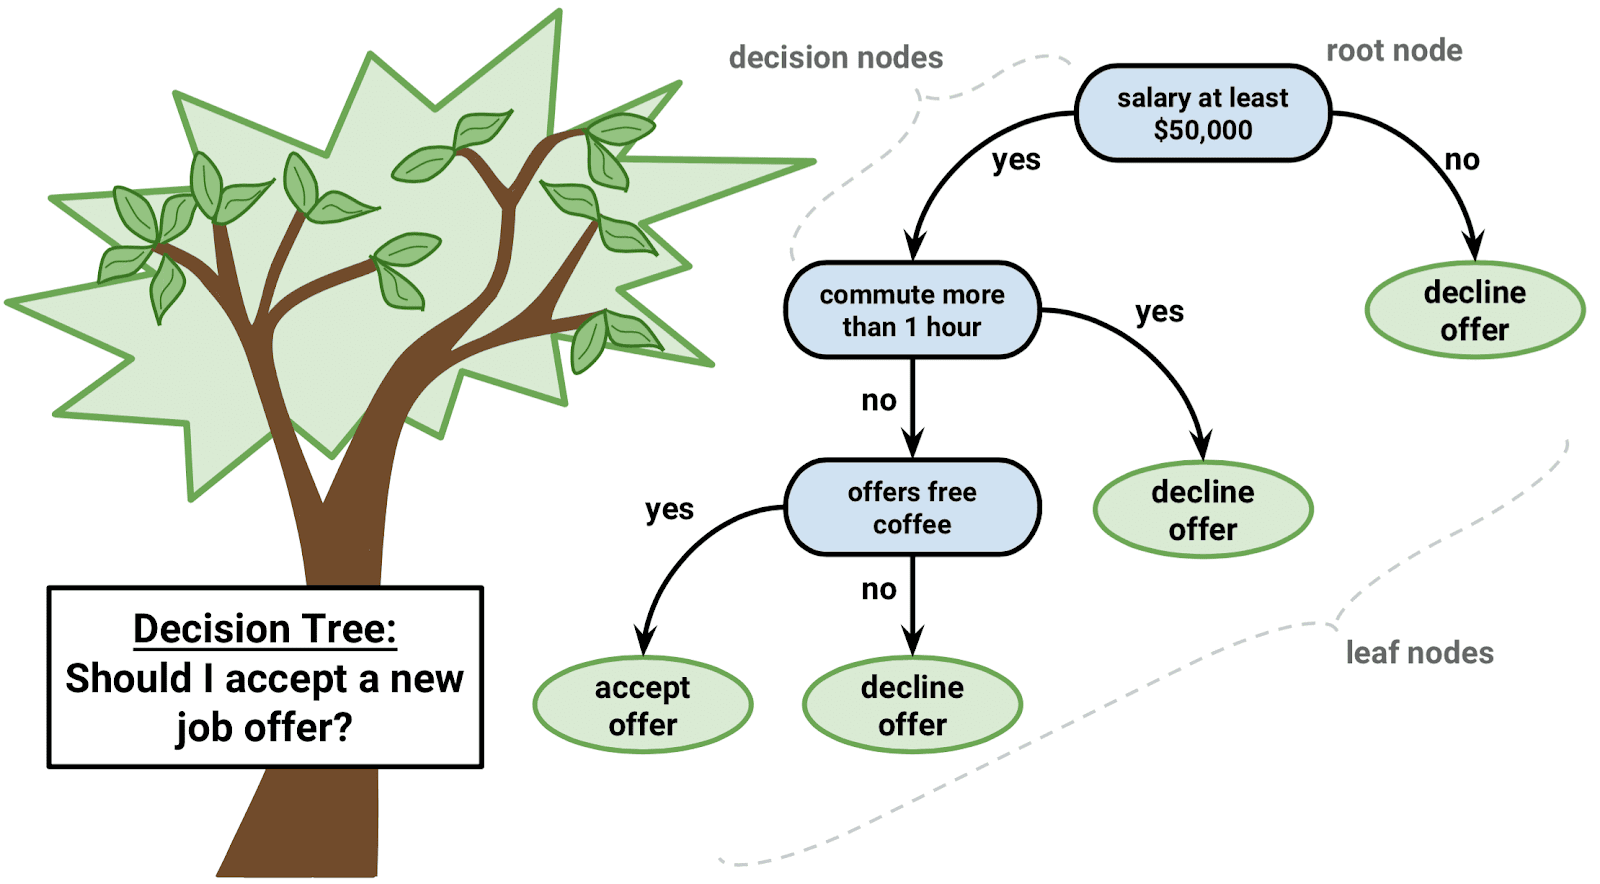


$ \ $

$(1)$ We create and train a tree with a max depth of 5.

In [ ]:
# separamos nuestros datos en datos de prueba (30 %) y datos de entrenamiento (70 %) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
# creamos un arbol clasificador con profundad maxima de 5
Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, random_state = 10)

# mostramos el arbol clasificar creado en pantalla
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

In [ ]:
# entrenamos nuestro arbol clasificador con la data de entrenamiento
Tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

$ \ $

$(2)$  we predict a dataset using our trained model and our test set.

In [ ]:
# predecimos un conjunto de datos con nuestro modelo
yhat = Tree.predict(X_test)

# mostramos en pantalla nuestra data predecida
yhat

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

$ \ $

$(3)$ We see the test error is much larger than the training error.

In [ ]:
def get_accuracy(X_train, X_test, y_train, y_test, model):

  # predecimos un conjunto de datos con la data de prueba y calculamos la precision entre y_test, y_pred
  y_pred_test = model.predict(X_test)
  accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

  # predecimos un conjunto de datos con la data de  entrenamiento y calculamos la precision entre y_test, y_pred
  y_pred_train = model.predict(X_train)
  accuracy_train = metrics.accuracy_score(y_train, y_pred_train)

  # la funcion devuelve 
  return  {"test Accuracy": accuracy_test, "train Accuracy": accuracy_train}

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test,  Tree)

{'test Accuracy': 0.6166666666666667, 'train Accuracy': 0.9071428571428571}

$ \ $

$(4)$ We plot the nodes of the tree.

In [ ]:
def plot_tree(model, filename = "tree.png"):
    
    # creamos un objeto con StringIO()
    dot_data = StringIO()
  
    # tomaremos estos rasgos del dataframe
    featureNames = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']

    # Esta función genera una representación GraphViz del árbol de decisiones, que luego se escribe en out_file
    out = tree.export_graphviz(model, feature_names = featureNames, out_file = dot_data, class_names = ['left','stay'], filled = True,  special_characters = True, rotate = False)  

    # Cargamos el gráfico según lo definido por los datos en formato DOT. Se supone que los datos están en formato DOT.
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

    # escribimos el grafico anterior en formato png
    graph.write_png(filename)

    # Leer la imagen de un archivo en una matriz
    img = mpimg.imread(filename)

    # describimos el tamaño de la imagen
    plt.figure(figsize = (100, 200))

    # la funcnion muestra la imagen que describe el grafico del arbol
    return plt.imshow(img, interpolation = 'nearest')


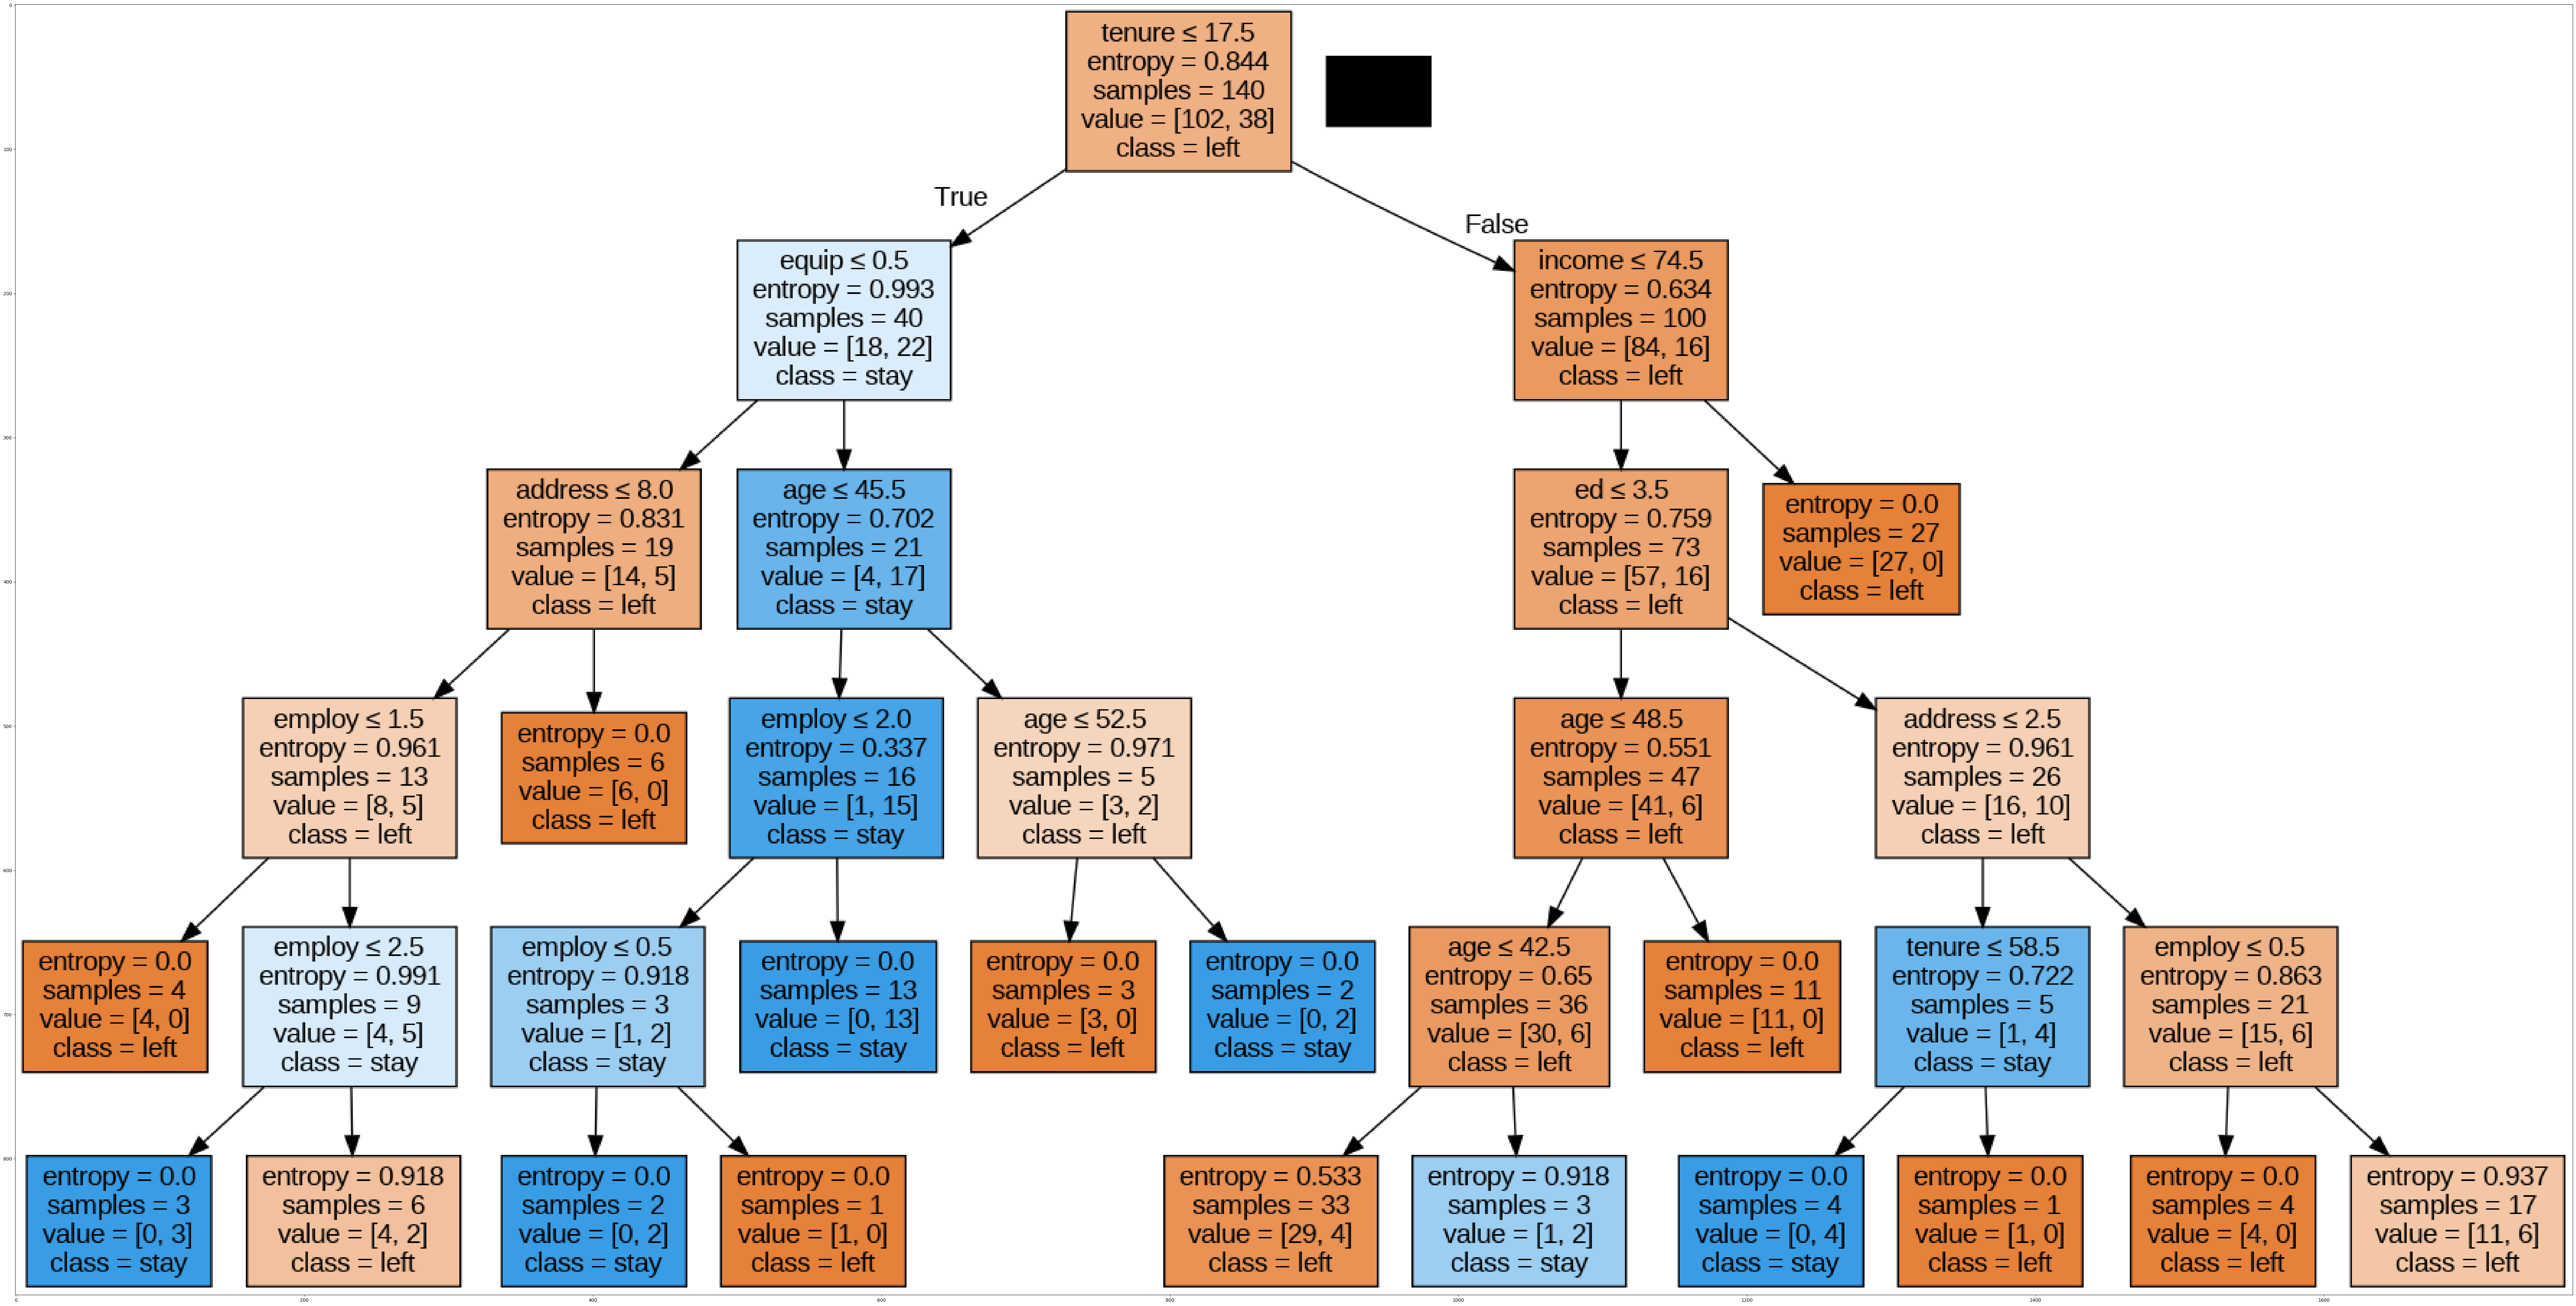

In [ ]:
plot_tree(model = Tree, filename = "tree.png")

$ \ $ 

$(5)$ We can repeat the process but sampling different data points from the same dataset. We see the tree still suffers from overfitting; in addition, the new tree is entirely different.

In [ ]:
# separamos nuestra data de nuevo, teniendo en cuenta que la data de prueba consiste de un 30 % y la data de entrenamiento de 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [ ]:
# creamos un arbol clasificador con profundad maxima de 5
Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, random_state = 8)

# entrenamos nuestro arbol clasificador con la data de entrenamiento
Tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=8)

In [ ]:
# usamos la funcion get_accuracy para obtener el error predictivo del arbol clasificador creado anteriormente
get_accuracy(X_train, X_test, y_train, y_test, Tree)

{'test Accuracy': 0.65, 'train Accuracy': 0.9357142857142857}

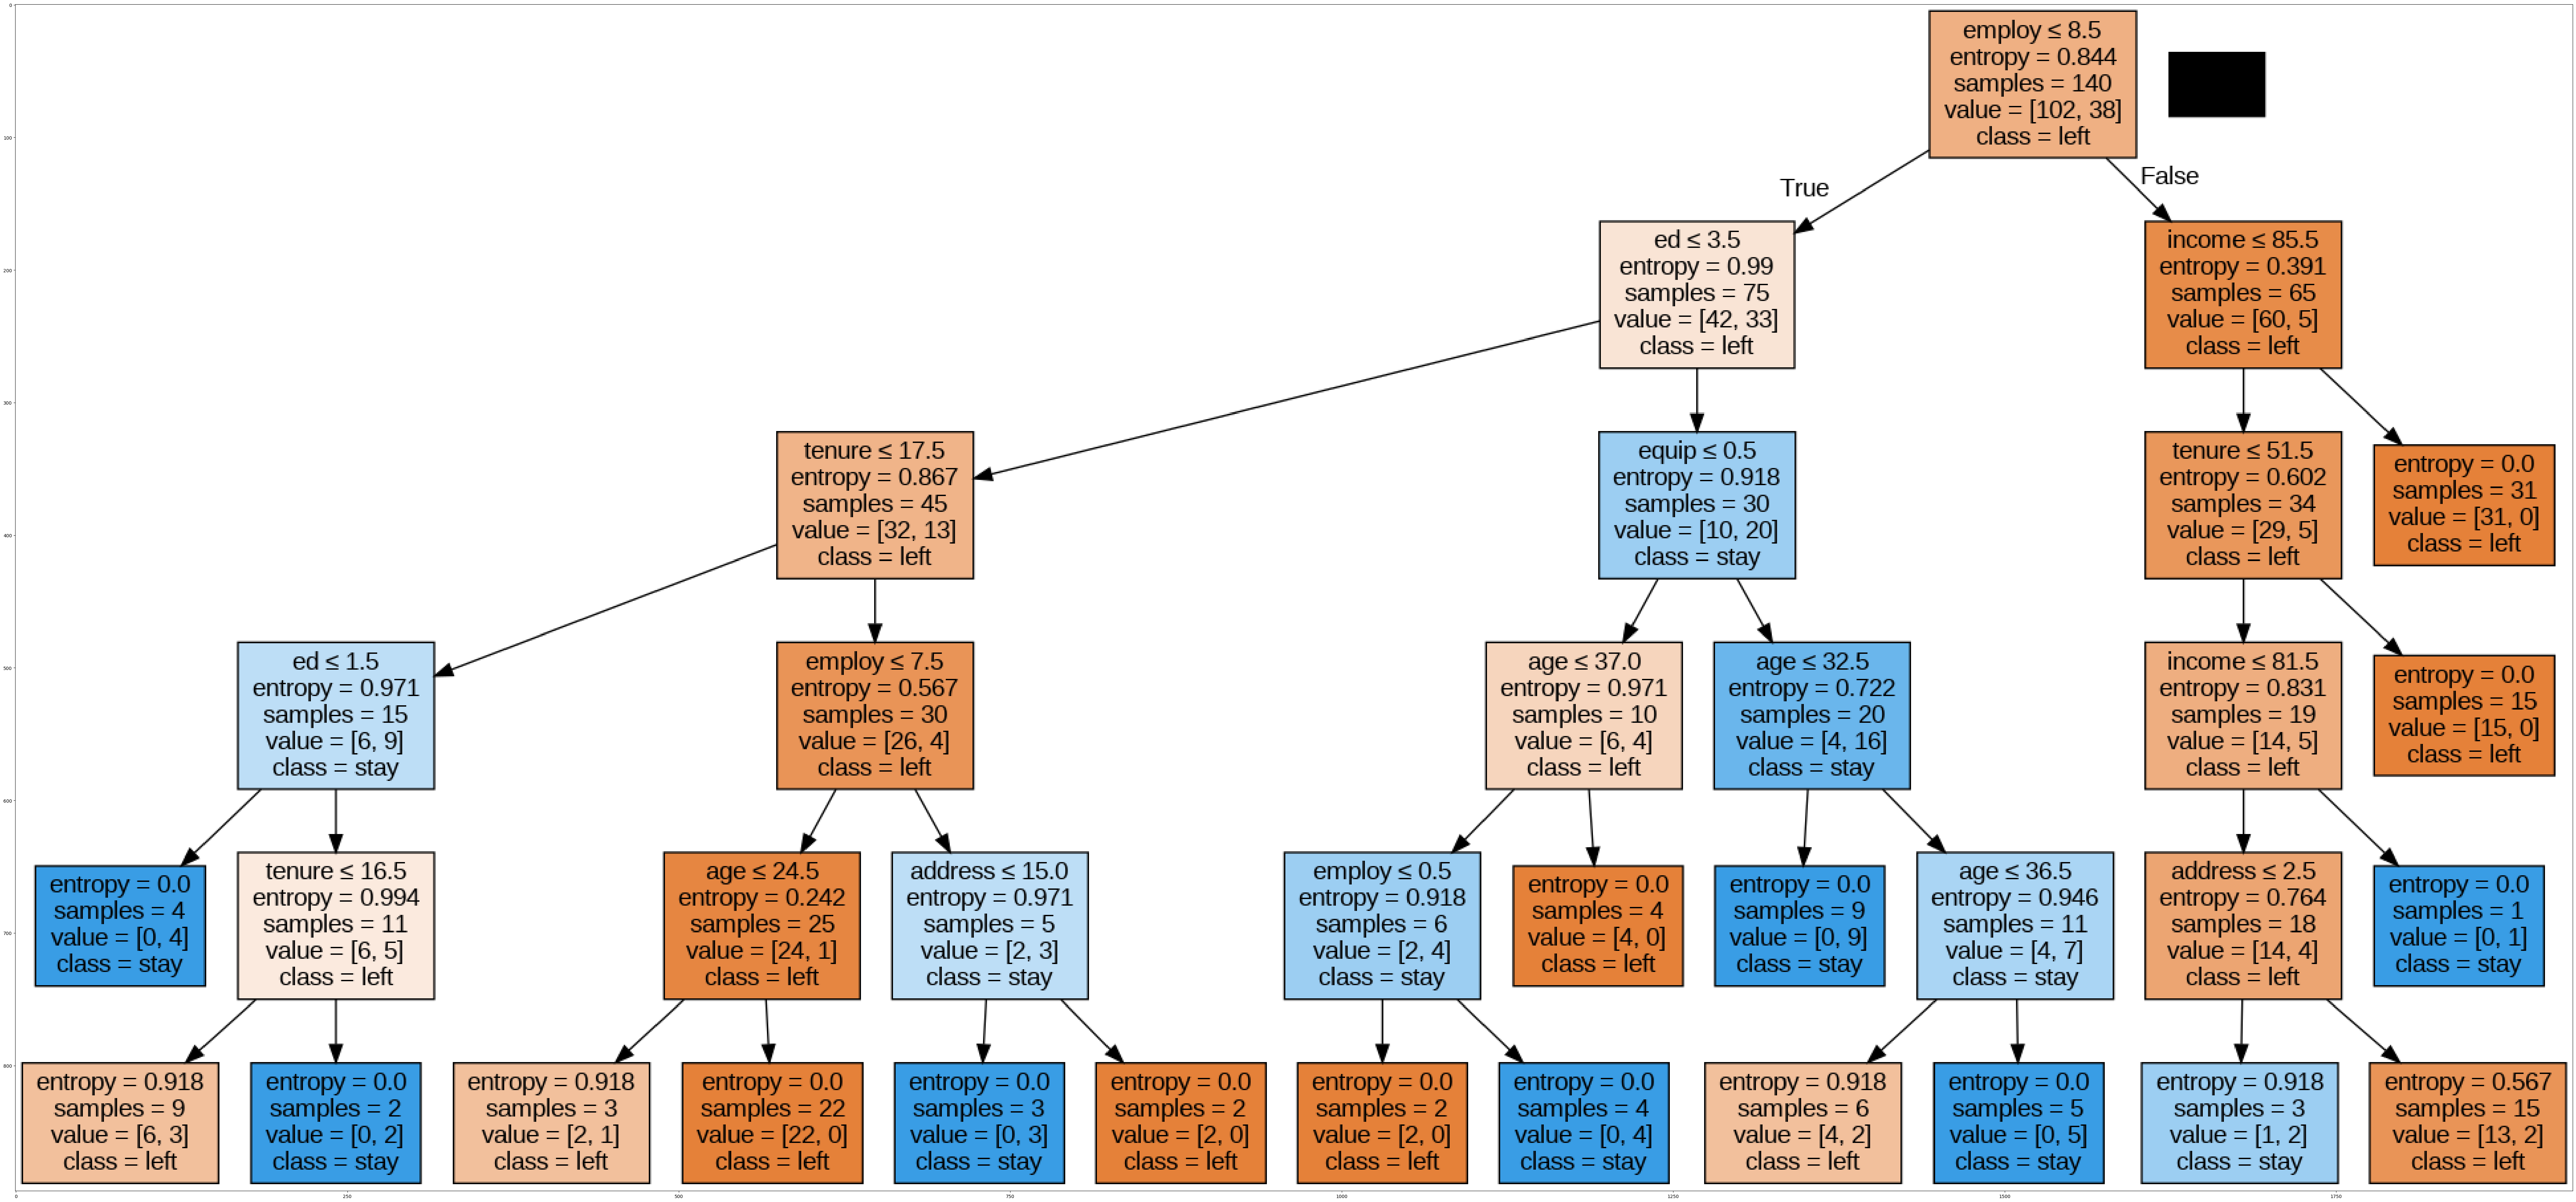

In [ ]:
# realizamos un plot del arbol clasificador 
plot_tree(filename = "tree1.png", model = Tree)

$ \ $

-----

## ***Bagging  for classification with  Scikit-learn***

$ \ $

A $\color{aquamarine}{\text{Bagging classifier}}$ is an ensemble model that trains  base classifiers  on random subsets   of the original dataset  (Bootstrap Sampling by default), and then aggregate their individual predictions by voting (de mayor a menor). 


$\color{aquamarine}{\text{Bagging}}$ improves models that suffer from overfitting (they do well on the training data, but they do not Generalize well).  $\color{orange}{\text{Decision Trees}}$ are a prime candidate for this reason, in addition, they are fast to train.

$ \ $

$(1)$ Create a <code>BaggingClassifier</code> object,  with a Decision Tree as the <code>base_estimator</code>



In [ ]:
# creamos un arbol clasificador con profundad maxima de 4
estimator = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, random_state = 2)

# creamos un objeto de tipo BaggingClassifier usando el arbol clasificador creado anteriormente
# Bootstrap Sampling es un método que implica extraer datos de muestra repetidamente con reemplazo de una fuente de datos para estimar un parámetro de población.
Bag = BaggingClassifier(estimator = estimator, n_estimators = 30, random_state = 0, bootstrap = True)

$ \ $

$(2)$ We fit the model with the tarining data.

In [ ]:
Bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=4,
                                                   random_state=2),
                  n_estimators=30, random_state=0)

$ \ $

$(3)$ The method <code>predict</code> aggregates the predictions by voting.

In [ ]:
Bag.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

$ \ $

$(4)$ We see the training accuracy is slightly better but the test accuracy improves  dramatically.

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test,  Bag)

{'test Accuracy': 0.7, 'train Accuracy': 0.9071428571428571}

$ \ $

$(5)$ Here we can see the impact of adding more estimators (Decision Trees) using in Bagging on the testing and training accuracy.

100%|██████████| 20/20 [02:06<00:00,  6.32s/it]


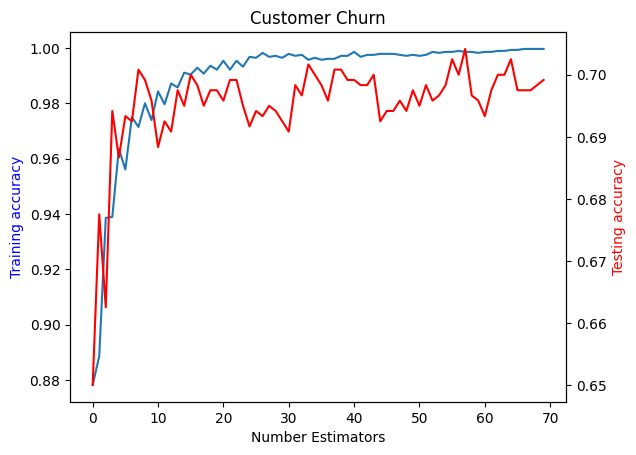

In [ ]:
get_accuracy_bag(X, y, "Customer Churn")

$ \ $

----

## ***Low Variance Example***

$ \ $

$\color{aquamarine}{\text{Bagging}}$ does not improve result if the model has low Variance.

$ \ $

$(1)$  Consider the SVM (support vector machine), then the accuracy on the tests data and training data are similar.

In [ ]:
# creamos un modelo SVC estableciendo como parametros kernel = 'linear', gamma = 'scale'
# Support Vector Classifier, es un algoritmo de aprendizaje automático supervisado que generalmente se usa para tareas de clasificación
clf = SVC(kernel = 'linear', gamma = 'scale')

# entrenamos nuestro modelo SVC
clf.fit(X_train, y_train) 

SVC(kernel='linear')

$ \ $

$(2)$ $\color{aquamarine}{\text{Bagging}}$ the SVM does almost nothing.

In [ ]:
# creamos un objeto de tipo BaggingClassifier usando el modelo svc creado anteriormente
Bag = BaggingClassifier(estimator = clf, n_estimators = 10, random_state = 0, bootstrap = True)

# entrenamos el modelo bag con la data de entrenamiento X_train, y_train
Bag.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(kernel='linear'), random_state=0)

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test,  Bag)

{'test Accuracy': 0.7, 'train Accuracy': 0.7785714285714286}

$ \ $

-----

## ***Example (cancer data)***

$ \ $

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007) [http://mlearn.ics.uci.edu/MLRepository.html](http://mlearn.ics.uci.edu/MLRepository.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01).
 
$ \ $

$(1)$ Let's load the dataset.

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


$ \ $

$(2)$ Now lets remove rows that have a **'?'** in the `BareNuc` column.


In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [ ]:
df["BareNuc"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [ ]:
df = df[df["BareNuc"] != "?"]
df["BareNuc"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

$ \ $

$(3)$ Now lets define the ***X*** and ***y*** for our dataset.

In [ ]:
# describimos los rasgos del dataframe
features = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']
X =  df[features]

# describimos el data target
y = df['Class']

$ \ $

$(4)$ Now lets split our data into training and testing data (80 % training --- 20 % testing) split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
print('Train set:', X_train.shape,  y_train.shape)

Train set: (546, 9) (546,)


In [ ]:
print('Test set:', X_test.shape,  y_test.shape)

Test set: (137, 9) (137,)


$ \ $

$(5)$ Here we are searching odd numbers from 1 to 39 for `n_estimators` and odd numbers from 1 to 20 for `max_depth` in the `base_estimator`.



In [ ]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)], 'estimator__max_depth' : [2*n+1 for n in range(10) ] }

$ \ $

$(6)$ Create a `BaggingClassifier` object called `Bag` with:

*  `estimator` = ***DecisionTreeClassifier***

* `random_state` = $0$.

*  `bootstrap` = True.


In [ ]:
Bag = BaggingClassifier(estimator = DecisionTreeClassifier(), random_state = 0, bootstrap = True)

$ \ $

$(7)$ Now we create a `GridSearchCV` object and search for the best parameters according to our `parameter_grid`.


In [ ]:
# creamos el objeto GridSearchCV con los parametros establecidos
search = GridSearchCV(estimator = Bag, param_grid = param_grid, scoring = 'accuracy', cv = 3)

In [ ]:
# entrenamos nuestro modelo GridSearchCV() con la data de entrenamiento X_train, y_train
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=0),
             param_grid={'estimator__max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                                  19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

$ \ $

$(8)$ We can see the best accuracy score of the searched parameters was ~97%.


In [ ]:
search.best_params_ 

{'estimator__max_depth': 5, 'n_estimators': 11}

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_)

{'test Accuracy': 0.9708029197080292, 'train Accuracy': 0.9853479853479854}

$ \ $

$(9)$ Below we can see a graph of testing and training accuracy holding the `max_depth` of the `estimator` at 10 and varying the number of estimators. We can see that it is extremely close to the accuracy of the `best_estimator` we found using `GridSearchCV`


100%|██████████| 20/20 [02:54<00:00,  8.71s/it]


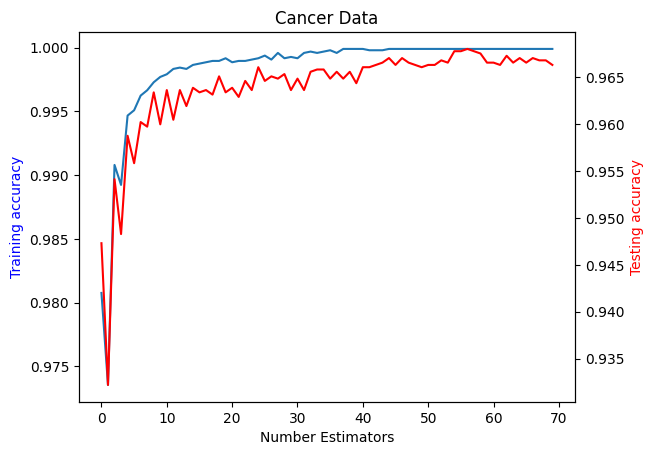

In [ ]:
get_accuracy_bag(X, y, "Cancer Data")

$ \ $

----

## ***Practice: During their course of treatment***

$ \ $

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The $\color{orange}{\text{features}}$ of this dataset are 

* $\color{orange}{\text{Age}}$, 

* $\color{orange}{\text{Sex}}$, 

* $\color{orange}{\text{Blood Pressure}}$

* $\color{orange}{\text{Cholesterol}}$ 

of the patients, and the $\color{yellow}{\text{target}}$ is

* $\color{yellow}{\text{the drug }}$

that each patient responded to. 

$ \ $

$(1)$ It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.



In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter = ",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


$ \ $

$(2)$ Let's create the ***X*** and ***y*** for our dataset.


In [ ]:
# obtenemos la data predictora
columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = df[columns].values

# obtenemos la data objetivo (target)
y = df["Drug"]

In [ ]:
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

In [ ]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

$ \ $

$(3)$ Now let's use a `LabelEncoder` to turn categorical features into numerical.


In [ ]:
# creamos un objeto de tipo LabelEncoder()
le_sex = preprocessing.LabelEncoder()

# entrenamos el model, teniendo en cuenta que f=female y m=male <-----------> estos son los valores de la columna 1 de X
le_sex.fit(['F','M'])

# cambiamos la columna 1 del array X por su correspondiente transformacion 
X[:, 1] = le_sex.transform(X[:, 1]) 

In [ ]:
# creamos un objeto de tipo LabelEncoder()
le_BP = preprocessing.LabelEncoder()

# entrenamos el modelo, teniendo en cuenta que ['LOW', 'NORMAL', 'HIGH'] estos son los valores de la columna 2 de X
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])

# cambiamos la columna 2 del array X por su correspondiente transformacion 
X[:, 2] = le_BP.transform(X[:, 2])

In [ ]:
# creamos un objeto de tipo LabelEncoder()
le_Chol = preprocessing.LabelEncoder()

# entrenamos el modelo, teniendo en cuenta que ['NORMAL', 'HIGH'] estos son los valores de la columna 3 de X
le_Chol.fit(['NORMAL', 'HIGH'])

# cambiamos la columna 3 del array X por su correspondiente transformacion 
X[:, 3] = le_Chol.transform(X[:, 3]) 

In [ ]:
# mostramos que nuestra data es puramente numerica
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

$ \ $

$(4)$ Split the data into training and testing data with a 80/20 split.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


$ \ $

$(5)$ Using the same parameter grid as before.

In [ ]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],  'base_estimator__max_depth' : [2*n+1 for n in range(10)]}

$ \ $

$(6)$ Create a `BaggingClassifier` object called `Bag` with:

* `estimator` = ***DecisionTreeClassifier()***

* `random_state` = $0$

* `bootstrap` = ***True***


In [ ]:
Bag = BaggingClassifier(estimator = DecisionTreeClassifier(), random_state = 0, bootstrap = True)

$ \ $

$(7)$ Create `GridSearchCV` object called `search` with:

* `estimator` = `Bag`,

* `param_grid` = `param_grid`,

* `scoring` = `accuracy`, 

* `cv` = ***3***.


In [ ]:
search = GridSearchCV(estimator = Bag, param_grid = param_grid, scoring = 'accuracy', cv = 3)

$ \ $

$(8)$ Fit the `GridSearchCV` object to our `X_train` and `y_train` data.


In [ ]:
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=0),
             param_grid={'base_estimator__max_depth': [1, 3, 5, 7, 9, 11, 13,
                                                       15, 17, 19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

$ \ $

$(9)$ After using `fit` we can see the best score and parameters.


In [ ]:
search.best_score_

1.0

In [ ]:
search.best_params_ 

{'base_estimator__max_depth': 5, 'n_estimators': 9}

In [ ]:
search.best_estimator_

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=9,
                  random_state=0)

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_)

{'test Accuracy': 0.95, 'train Accuracy': 1.0}

$ \ $

$(10)$ Below we can see a graph of testing and training accuracy holding the max_depth of the base_estimator at 10 and varying the number of estimators. We can see that it is extremely close to the accuracy of the best_estimator we found using GridSearchCV.

100%|██████████| 20/20 [02:15<00:00,  6.78s/it]


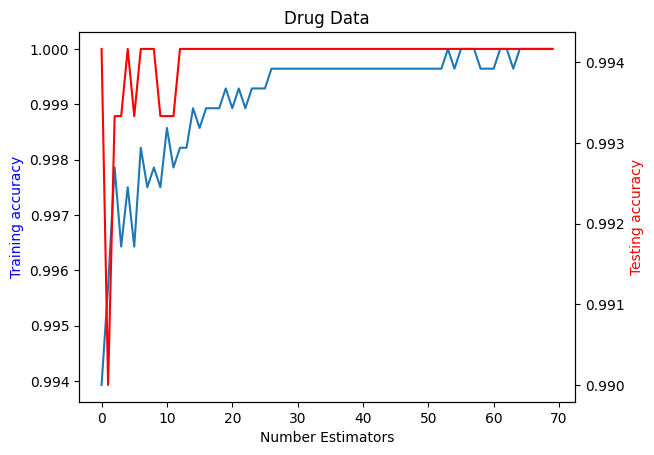

In [ ]:
get_accuracy_bag(X, y, "Drug Data")

$ \ $

----

## ***Want to learn more?***

$ \ $

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>